In [1]:
#Install Libraries
# !pip install yahoofinancials
# !pip install pytictoc
# !pip install yahoo_fin
# !pip install stumpy

In [2]:
#Importing Libraries
import pandas as pd
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials as yf
import yahoo_fin.stock_info as si
from pytictoc import TicToc
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
t=TicToc()

import stumpy

In [3]:
end_date = date.today().strftime('%m/%d/%Y')
end_date

'09/29/2022'

In [24]:
spx_all = si.get_data('^GSPC' , start_date = '01/01/1950' , end_date = end_date)["close"].to_frame().round(1)

In [25]:
spx_all.head()

,close
2010-06-29,1.6
2010-06-30,1.6
2010-07-01,1.5
2010-07-02,1.3
2010-07-06,1.1


In [26]:
spx_all.shape

(3085, 1)

<AxesSubplot:>

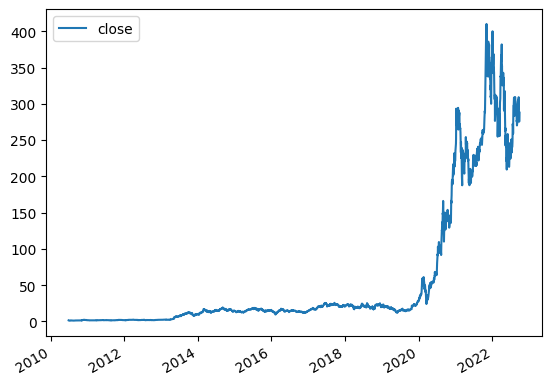

In [27]:
spx_all.plot()

In [28]:
from pandas.core import window
spx_all["5DMA"] = spx_all["close"].rolling(5).mean().round(1)
spx_all["30DMA"] = spx_all["close"].rolling(30).mean().round(1)
spx_all = spx_all.dropna()

In [29]:
spx_all.head()

,close,5DMA,30DMA
2010-08-10,1.3,1.3,1.3
2010-08-11,1.2,1.3,1.3
2010-08-12,1.2,1.3,1.3
2010-08-13,1.2,1.2,1.3
2010-08-16,1.3,1.2,1.3


In [30]:
sel_start = date(2021,1,1)

In [31]:
spx_sel = spx_all[sel_start:date.today()]
spx_sel.head()

,close,5DMA,30DMA
2021-01-04,243.3,230.7,206.4
2021-01-05,245.0,235.4,209.0
2021-01-06,252.0,241.4,212.0
2021-01-07,272.0,249.5,215.3
2021-01-08,293.3,261.1,218.9


In [32]:
spx_past = spx_all[:sel_start]

In [33]:
spx_past.tail()

,close,5DMA,30DMA
2020-12-24,220.6,219.5,191.9
2020-12-28,221.2,217.4,194.7
2020-12-29,222.0,218.5,197.6
2020-12-30,231.6,222.1,200.8
2020-12-31,235.2,226.1,203.7


In [34]:
distance_profile = stumpy.mass(spx_sel["5DMA"], spx_past["5DMA"],normalize=True)

In [35]:
distance_profile[1:5]

array([26.13706876, 26.17837892, 26.23407543, 26.30431454])

In [36]:
idx = np.argmin(distance_profile)

print(f"The nearest neighbor to `spx_sel` is located at index {idx} in `spx_past`")

The nearest neighbor to `spx_sel` is located at index 1476 in `spx_past`


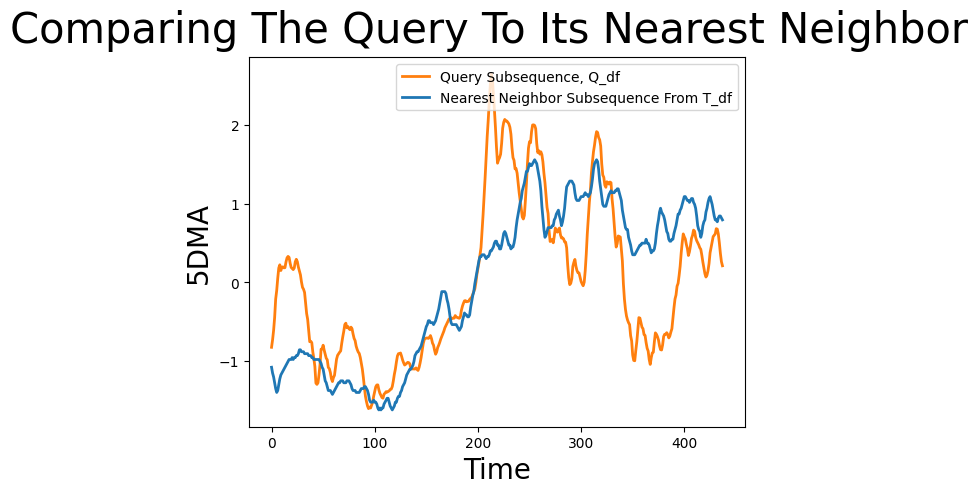

In [37]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
spx_sel_z_norm = stumpy.core.z_norm(spx_sel["5DMA"].values)
nn_z_norm = stumpy.core.z_norm(spx_past["5DMA"].values[idx:idx+len(spx_sel)])

plt.suptitle('Comparing The Query To Its Nearest Neighbor', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('5DMA', fontsize='20')
plt.plot(spx_sel_z_norm, lw=2, color="C1", label="Query Subsequence, Q_df")
plt.plot(nn_z_norm, lw=2, label="Nearest Neighbor Subsequence From T_df")
plt.legend()
plt.show()

In [38]:
spx_past.iloc[idx]

close    14.6
5DMA     14.5
30DMA    14.5
Name: 2016-06-21 00:00:00, dtype: float64

In [39]:
# This simply returns the (sorted) positional indices of the top 16 smallest distances found in the distance_profile
k = 5
idxs = np.argpartition(distance_profile, k)[:k]
idxs = idxs[np.argsort(distance_profile[idxs])]

In [40]:
print(idxs)

[1476 1477 1475 1478 1474]


In [41]:
distance_profile

array([26.1086604 , 26.13706876, 26.17837892, ..., 26.34110741,
       26.32452992, 26.30515608])

In [42]:
matches = stumpy.match(spx_sel["5DMA"],spx_past["5DMA"])

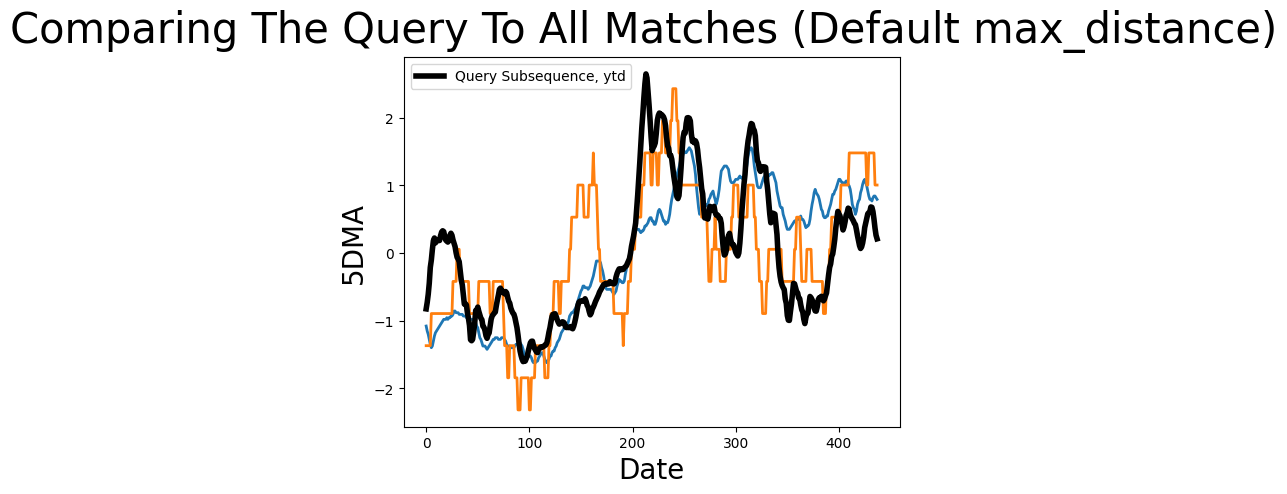

In [43]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
ytd_z_norm = stumpy.core.z_norm(spx_sel["5DMA"].values)

plt.suptitle('Comparing The Query To All Matches (Default max_distance)', fontsize='30')
plt.xlabel('Date', fontsize ='20')
plt.ylabel('5DMA', fontsize='20')
for match_distance, match_idx in matches:
    match_z_norm = stumpy.core.z_norm(spx_past["5DMA"].values[match_idx:match_idx+len(spx_sel["5DMA"])])
    plt.plot(match_z_norm, lw=2)
plt.plot(ytd_z_norm, lw=4, color="black", label="Query Subsequence, ytd")
plt.legend()
plt.show()